# Imports

In [1]:
from library.dataPreprocessLib import *
from library.resultsLib import *
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC
import os

# Data Preprocessing

## Feature Selection and Loading Data

In [2]:
# name = "prantika_bus_stand"
# name = "junction_mall"
name = "54ft_road"
# name = "dvc_more"
# name = "station"

In [3]:
parent_dir = r"../data/54ft/"
train_df_name = r"54ft_train.csv"
test_df_name = f"{name}_test_split.csv"

In [4]:
poi_column = 'Is_Signal'
output_result_filename = f"{poi_column}_test_result_{name}_zone.csv"

In [5]:
feature_names=['time_zone','stay_duration','wifi_count', 'edge_wifi_count', 'honk_duration',\
               'edge_honk_duration', 'd_wifi_count','d_edge_wifi_count','d_honk_duration',\
               'd_edge_honk_duration', 'human_made','natural_land','road_exist_percent',\
               'highly_populated_poi_exist', 'RSI']

categorical_features=[0,13]

### Training Data

In [6]:
train_csv_df = pd.read_csv(os.path.join(parent_dir, train_df_name))
train_df = get_processed_df(train_csv_df)
train_df.head()

,time_zone,stay_duration,wifi_count,edge_wifi_count,honk_duration,edge_honk_duration,d_wifi_count,d_edge_wifi_count,d_honk_duration,d_edge_honk_duration,human_made,natural_land,road_exist_percent,highly_populated_poi_exist,RSI,Is_Bus_stop,Is_Turn,Is_Signal,Is_Congestion,Is_Adhoc
0,Afternoon,6,0,0.000000,0.0,0.000000,0,0.000000,0.0,0.000000,0.111232,0.636805,0.251963,No,0.000000,Not Bus_stop,Not Turn,Not Signal,Not Congestion,Adhoc
1,Afternoon,10,3,0.015468,1.0,0.015468,3,0.015468,1.0,0.015468,0.124869,0.666587,0.208544,No,2.715045,Bus_stop,Not Turn,Not Signal,Not Congestion,Not Adhoc
2,Afternoon,130,2,0.027800,5.0,0.000000,4,0.018533,5.0,0.000000,0.100360,0.743668,0.155972,No,2.422751,Bus_stop,Turn,Not Signal,Not Congestion,Not Adhoc
3,Afternoon,13,0,0.000000,2.0,0.000000,0,0.000000,2.0,0.000000,0.100911,0.730013,0.169076,No,3.040420,Not Bus_stop,Not Turn,Not Signal,Not Congestion,Adhoc
4,Afternoon,9,0,0.002818,2.0,0.005635,0,0.002818,2.0,0.005635,0.117394,0.487688,0.183064,Yes,1.780860,Bus_stop,Turn,Not Signal,Not Congestion,Not Adhoc


### Testing Data

In [7]:
test_csv_df = pd.read_csv(os.path.join(parent_dir, test_df_name))
test_df = get_processed_df(test_csv_df)
test_df.head()

,time_zone,stay_duration,wifi_count,edge_wifi_count,honk_duration,edge_honk_duration,d_wifi_count,d_edge_wifi_count,d_honk_duration,d_edge_honk_duration,human_made,natural_land,road_exist_percent,highly_populated_poi_exist,RSI,Is_Bus_stop,Is_Turn,Is_Signal,Is_Congestion,Is_Adhoc
0,Morning,11,2,9.000000e+07,1.0,1.500000e+08,5,6.000000e+07,10.0,6.000000e+07,0.228177,0.500080,0.271135,Yes,16.869160,Bus_stop,Not Turn,Not Signal,Not Congestion,Not Adhoc
1,Morning,2,0,0.000000e+00,0.0,3.001053e-02,0,0.000000e+00,0.0,3.001053e-02,0.200089,0.459261,0.268251,Yes,1.625491,Not Bus_stop,Not Turn,Not Signal,Not Congestion,Adhoc
2,Afternoon,8,0,1.284996e-02,0.0,0.000000e+00,3,6.424979e-03,0.0,0.000000e+00,0.254925,0.459994,0.285081,No,1.346294,Not Bus_stop,Not Turn,Not Signal,Not Congestion,Adhoc
3,Afternoon,8,1,4.798794e-02,1.0,3.199196e-02,1,4.798794e-02,4.0,1.999498e-02,0.218173,0.510915,0.270912,No,1.388512,Bus_stop,Not Turn,Not Signal,Not Congestion,Not Adhoc
4,Afternoon,13,4,3.644770e-02,5.0,3.037308e-02,4,3.644770e-02,5.0,3.037308e-02,0.228172,0.489662,0.277140,Yes,1.421124,Bus_stop,Not Turn,Not Signal,Not Congestion,Not Adhoc


### Seperating target column and input columns

In [8]:
X = train_df[feature_names].copy()
y = train_df[poi_column].copy()

## Using SMOTE

In [9]:
smote = SMOTENC(categorical_features=categorical_features)
smote

SMOTENC(categorical_features=[0, 13])

In [10]:
X_resampled, y_resampled = smote.fit_sample(X, y)
print(X.shape)
print(y.shape)
print(X_resampled.shape)
print(y_resampled.shape)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


(2480, 15)
(2480,)
(4632, 15)
(4632,)


## Categorical data Transformation

### For train data

In [11]:
train_array = X_resampled.values
les = [get_label_encoder(train_array[:, feature]) for feature in categorical_features]

In [12]:
encoder = get_one_hot_encoder(train_array, categorical_features)
label_encoder = get_label_encoder(y_resampled)

In [13]:
train_data = transform_categorical_features(train_array, encoder, les, categorical_features, for_train=True)
train_labels = get_labels_for(poi_column, pd.DataFrame(y_resampled), label_encoder)

### For test data

In [14]:
test_array = test_df[feature_names].values

In [15]:
test_data = transform_categorical_features(test_array, encoder, les, categorical_features)
test_labels = get_labels_for(poi_column, test_df, label_encoder)

# Training

In [16]:
model = RandomForestClassifier(n_estimators=20,max_depth=8)
model.fit(train_data, train_labels)
train_predictions = model.predict(train_data) # for training performance stat

# Testing

In [17]:
assert test_data.shape[1] == train_data.shape[1]
test_predictions = model.predict(test_data)

# Performance Stat

## Training Performance

In [18]:
get_performance_stats("train", train_labels, train_predictions)

For train: 
	Accuracy: 0.9550949913644214
	Precision: 0.9564893467417875
	Recall: 0.9550949913644214
	F1 score: 0.9550606743585535
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2316
           1       0.93      0.98      0.96      2316

    accuracy                           0.96      4632
   macro avg       0.96      0.96      0.96      4632
weighted avg       0.96      0.96      0.96      4632



## Testing Performance

In [19]:
get_performance_stats("test", test_labels, test_predictions)

For test: 
	Accuracy: 1.0
	Precision: 1.0
	Recall: 1.0
	F1 score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



### Confusion Matrix

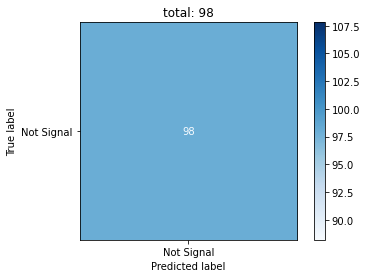

In [20]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
disp = plot_confusion_matrix(model, test_data, test_labels, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
disp.ax_.set_title(f'total: {len(test_data)}')
plt.show()

### Check & Save Predicitons

In [21]:
result_df = form_result_df(test_csv_df, label_encoder.inverse_transform(test_predictions), poi_column)
result_df.head()

,instance_date,instance_start_time,instance_end_time,Prediction Is_Signal
0,09/14/2019,12:36:15,12:36:26,Not Signal
1,09/14/2019,12:36:38,12:36:39,Not Signal
2,09/14/2019,17:16:49,17:16:56,Not Signal
3,09/14/2019,17:17:33,17:17:40,Not Signal
4,09/14/2019,17:18:04,17:18:19,Not Signal


In [22]:
result_df.to_csv(os.path.join(parent_dir, output_result_filename), index=False)

In [23]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])